# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
# TODO: Make all necessary imports.


!pip install -q tqdm==4.28.1
!pip install -q -U tensorflow_datasets


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InLineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


2025-10-04 04:44:27.329890: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-04 04:44:27.329948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-04 04:44:27.330007: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using:
	• TensorFlow version: 2.14.0
	• Running on GPU


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [2]:
# TODO: Load the dataset with TensorFlow Datasets.
import tensorflow_datasets as tfds

train_split = 'train[:60%]'
val_split   = 'train[60%:80%]'
test_split  = 'train[80%:]'

splits = [train_split, val_split, test_split]

####### i used this because the subsplit attribute is not in the newest version that i used

dataset, dataset_info = tfds.load(
    'oxford_flowers102',
    split=splits,
    as_supervised=True,
    with_info=True
)


# TODO: Create a training set, a validation set and a test set.
training_set, validation_set, test_set= dataset

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:02<?, ? url/s]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:02<00:04,  2.27s/ url]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<15:51,  2.91s/ MiB]

Dl Size...:   1%|          | 2/328 [00:03<15:48,  2.91s/ MiB]

Dl Size...:   1%|          | 3/328 [00:03<15:45,  2.91s/ MiB]

Dl Size...:   1%|          | 4/328 [00:03<15:42

Dl Size...:  17%|█▋        | 55/328 [00:04<00:30,  9.06 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:04<00:30,  9.06 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:04<00:29,  9.06 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:04<00:29,  9.06 MiB/s]

Extraction completed...: 0 file [00:04, ? file/s]
Dl Size...:  18%|█▊        | 59/328 [00:04<00:17, 15.79 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:04<00:16, 15.79 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:05<00:16, 15.79 MiB/s]

Dl Size...:  21%|██        | 69/328 [00:05<00:16, 15.7

Dl Size...:  35%|███▌      | 116/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:06<00:09, 21.34 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:06<00:09, 21.34 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  38%|███▊      | 126/328 [00:07<00:08, 24.85 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:07<00:08, 24.85 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:07<00:08, 24.85 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00:07<00:08, 24.85 MiB/s]

Dl Size...:  40%|███▉      | 130/328 [00

Dl Size...:  54%|█████▎    | 176/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  56%|█████▌    | 183/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  58%|█████▊    | 190/328 [00:08<00:05, 27.47 MiB/s]

Dl Size...:  58%|█████▊  

Dl Size...:  72%|███████▏  | 237/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  77%|███████▋  | 251/328 [00:10<00:02, 30.34 MiB/s]

Dl Size...:  77%|███████▋

Dl Size...:  91%|█████████ | 297/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  95%|█████████▍| 311/328 [00:12<00:00, 31.62 MiB/s]

Dl Size...:  95%|████████

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.73 MiB/s]

Dl Completed...: 100%|███

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)


Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|█████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.73 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.73 MiB/s]IOPub message rate exceeded

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Extraction completed...:   4%|▎         | 296/8189 [00:53<114:24:32, 52.18s/ file]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Siz

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.73 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Curren

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Extraction completed...:  18%|█▊        | 1486/8189 [00:57<02:14, 49.80 file/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]



Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Extraction completed...:  37%|███▋      | 3026/8189 [01:02<00:28, 184.13 file/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Extraction completed...:  74%|███████▍  | 6057/8189 [01:12<00:07, 291.97 file/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.73 MiB/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.73 MiB/s]

Dl Size...: 100%|████████

## Explore the Dataset

In [3]:
# TODO: Get the number of examples in each set from the dataset info.
num_ex= dataset_info.splits['train'].num_examples
print(f'\nThere are {num_ex} images in the training set')
# TODO: Get the number of classes in the dataset from the dataset info.
num_classes= dataset_info.features['label'].num_classes
print(f'\nThere are {num_classes} images in the training set')



There are 1020 images in the training set

There are 102 images in the training set


In [4]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(1):
    print('The images in the training set have:')
    print('\u2022 dtype:', image.dtype) 
    print('\u2022 shape:', image.shape)
  
    print('\nThe labels of the images have:')
    print('\u2022 dtype:', label.dtype) 

The images in the training set have:
• dtype: <dtype: 'uint8'>
• shape: (500, 667, 3)

The labels of the images have:
• dtype: <dtype: 'int64'>


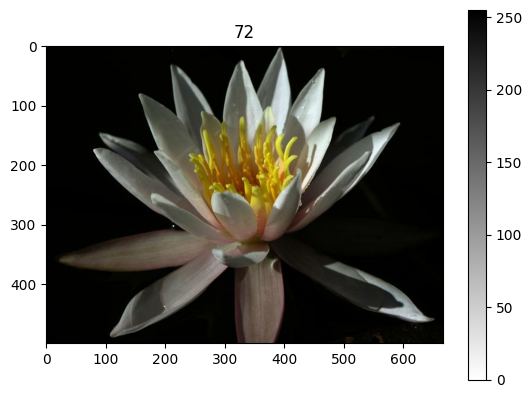

In [5]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.title(label)
plt.show()



### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [6]:
import json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

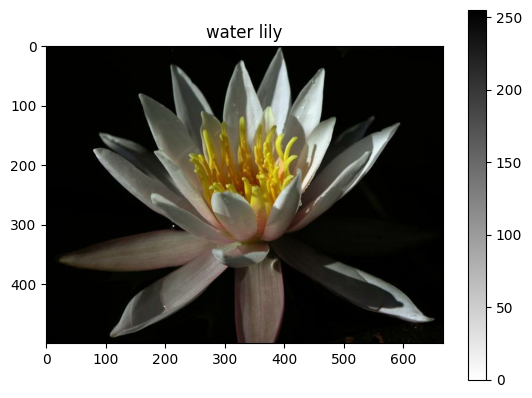

In [7]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()

plt.title(class_names[str(label)])
plt.show()

## Create Pipeline

In [8]:
# TODO: Create a pipeline for each set.
batch_size = 32
image_size = 224

num_training_examples = len(training_set)

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)          
    image = tf.image.random_brightness(image, max_delta=0.1) 
    image = tf.image.random_contrast(image, 0.9, 1.1)        
    return image, label

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label
total_examples = dataset_info.splits['train'].num_examples + dataset_info.splits['test'].num_examples

num_training_examples = dataset_info.splits['train'].num_examples
num_validation_examples = dataset_info.splits['validation'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

training_batches = training_set.shuffle(num_training_examples).map(format_image).map(augment_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [9]:
# TODO: Build and train your network.
import tensorflow_hub as hub

URL = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5"
feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size, 3), trainable=False)

model = tf.keras.Sequential([
    
    feature_extractor,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(
        102,
        activation='softmax',
        kernel_regularizer=tf.keras.regularizers.l2(0.01)
    )
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    training_batches,
    validation_data=validation_batches,
    epochs=20
)

Epoch 1/20
20/20 [==============================] - 13s 171ms/step - loss: 6.4753 - accuracy: 0.0343 - val_loss: 5.8800 - val_accuracy: 0.1176
Epoch 2/20
20/20 [==============================] - 3s 74ms/step - loss: 5.2081 - accuracy: 0.2827 - val_loss: 5.1356 - val_accuracy: 0.3235
Epoch 3/20
20/20 [==============================] - 2s 74ms/step - loss: 4.2754 - accuracy: 0.5654 - val_loss: 4.5241 - val_accuracy: 0.4755
Epoch 4/20
20/20 [==============================] - 2s 74ms/step - loss: 3.6141 - accuracy: 0.7402 - val_loss: 4.0835 - val_accuracy: 0.5686
Epoch 5/20
20/20 [==============================] - 2s 74ms/step - loss: 3.1227 - accuracy: 0.8562 - val_loss: 3.7613 - val_accuracy: 0.6373
Epoch 6/20
20/20 [==============================] - 2s 70ms/step - loss: 2.8293 - accuracy: 0.8775 - val_loss: 3.4958 - val_accuracy: 0.6667
Epoch 7/20
20/20 [==============================] - 2s 72ms/step - loss: 2.5064 - accuracy: 0.9232 - val_loss: 3.3134 - val_accuracy: 0.7010
Epoch 8/20


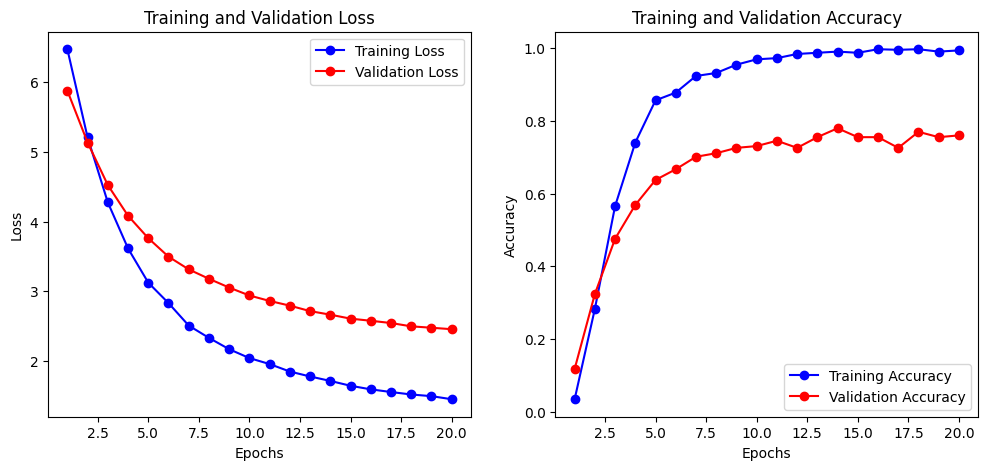

In [11]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
               
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
               
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [12]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

test_loss, test_acc = model.evaluate(testing_batches, verbose=2)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

7/7 - 1s - loss: 2.5049 - accuracy: 0.7255 - 707ms/epoch - 101ms/step
Test Loss: 2.504875421524048
Test Accuracy: 0.7254902124404907


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [13]:

model.save("flower_classifier.h5")



## Load the Keras Model

Load the Keras model you saved above.

In [14]:
# TODO: Load the Keras model
oaded_model = tf.keras.models.load_model("flower_classifier.h5",
                                       custom_objects={'KerasLayer': hub.KerasLayer})


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [15]:
# TODO: Create the process_image function
def process_image(image):
    
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0

   
    return image.numpy()



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

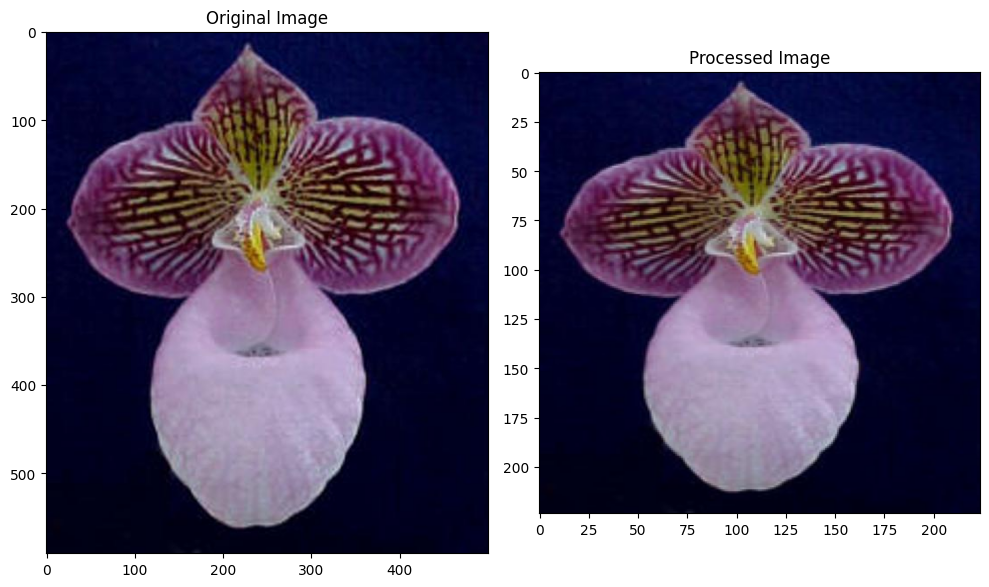

In [16]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [17]:
# TODO: Create the predict function


def predict(image_path, model, top_k=5):
    image = Image.open(image_path)
    image = np.asarray(image)
    image = process_image(image)
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    probs, classes = tf.math.top_k(preds, k=top_k)
    return probs.numpy().flatten(), classes.numpy().flatten()


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 33ms/step


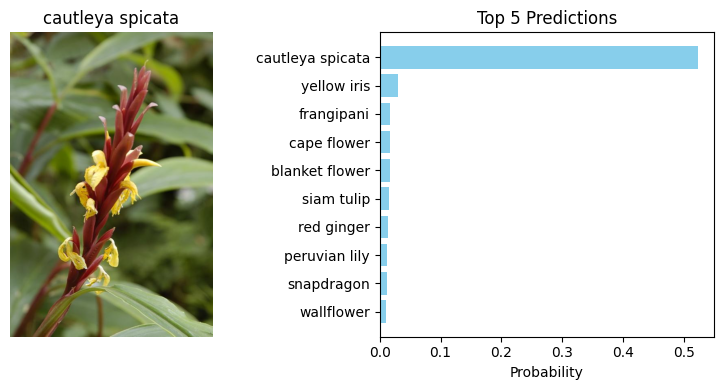

1/1 [==============================] - 0s 32ms/step


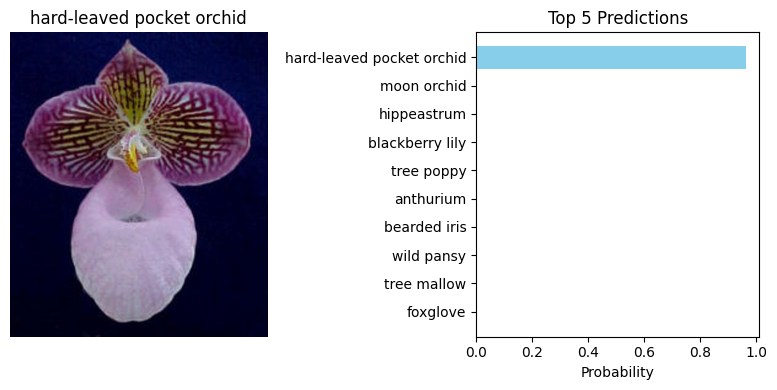

1/1 [==============================] - 0s 33ms/step


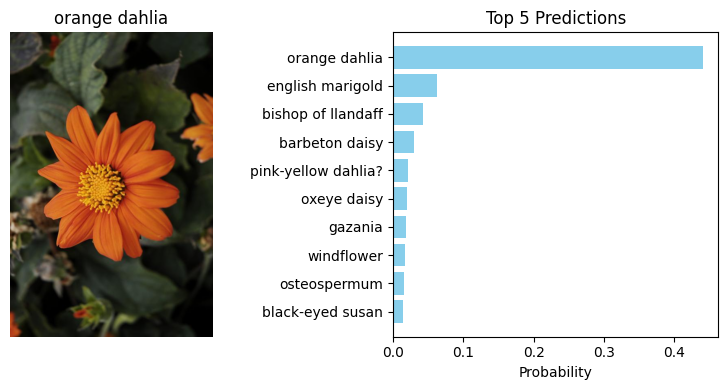

1/1 [==============================] - 0s 33ms/step


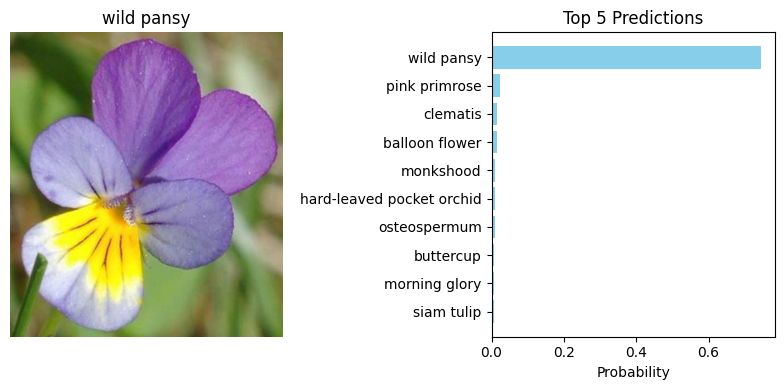

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

test_images = [
    "test_images/cautleya_spicata.jpg",
    "test_images/hard-leaved_pocket_orchid.jpg",
    "test_images/orange_dahlia.jpg",
    "test_images/wild_pansy.jpg"
]

for image_path in test_images:
    probs, classes = predict(image_path, model, top_k=10)
    
    # Convert numeric class labels to string keys for class_names
    flower_names = [class_names[str(c)] for c in classes]
    
    # Load image
    img = mpimg.imread(image_path)
    
    # Create figure
    plt.figure(figsize=(8, 4))
    
    # Plot image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_names[str(classes[0])])  # title = top predicted flower
    
    # Plot probabilities
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(flower_names))
    plt.barh(y_pos, probs, align='center', color='skyblue')
    plt.yticks(y_pos, flower_names)
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
